# Pymaceuticals Inc.
---

### Analysis

There were 248 mice that received treatment; this is a revision from the previously stated count of 249. Over the course of 45 days, it was observed that Capomulin and Ramicane were the most frequently administered drugs, while Propriva was the least used. The gender distribution among the mice was relatively balanced, with a slightly higher number of male mice at 126 compared to 122 females. Capomulin and Ramicane showed the most effective results in reducing tumor size. A randomly selected mouse treated with Capomulin demonstrated impressive results. Furthermore, a correlation was noted between heavier mice and larger average tumor volumes under the Capomulin treatment.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results,mouse_metadata , on='Mouse ID', how='left')

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = merged_data['Mouse ID'].value_counts()
mouse_count

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

analysis_data_df = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)==False]
analysis_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
# clean_mouse_count = cleaned_data['Mouse ID'].value_counts()
# clean_mouse_count
len(analysis_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()

regimen_median = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()

regimen_variance = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()

regimen_std = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()

regimen_sem = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

regimen_statsdf = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median, "Variance": regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
regimen_statsdf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

summary_table = analysis_data_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})

summary_agg_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

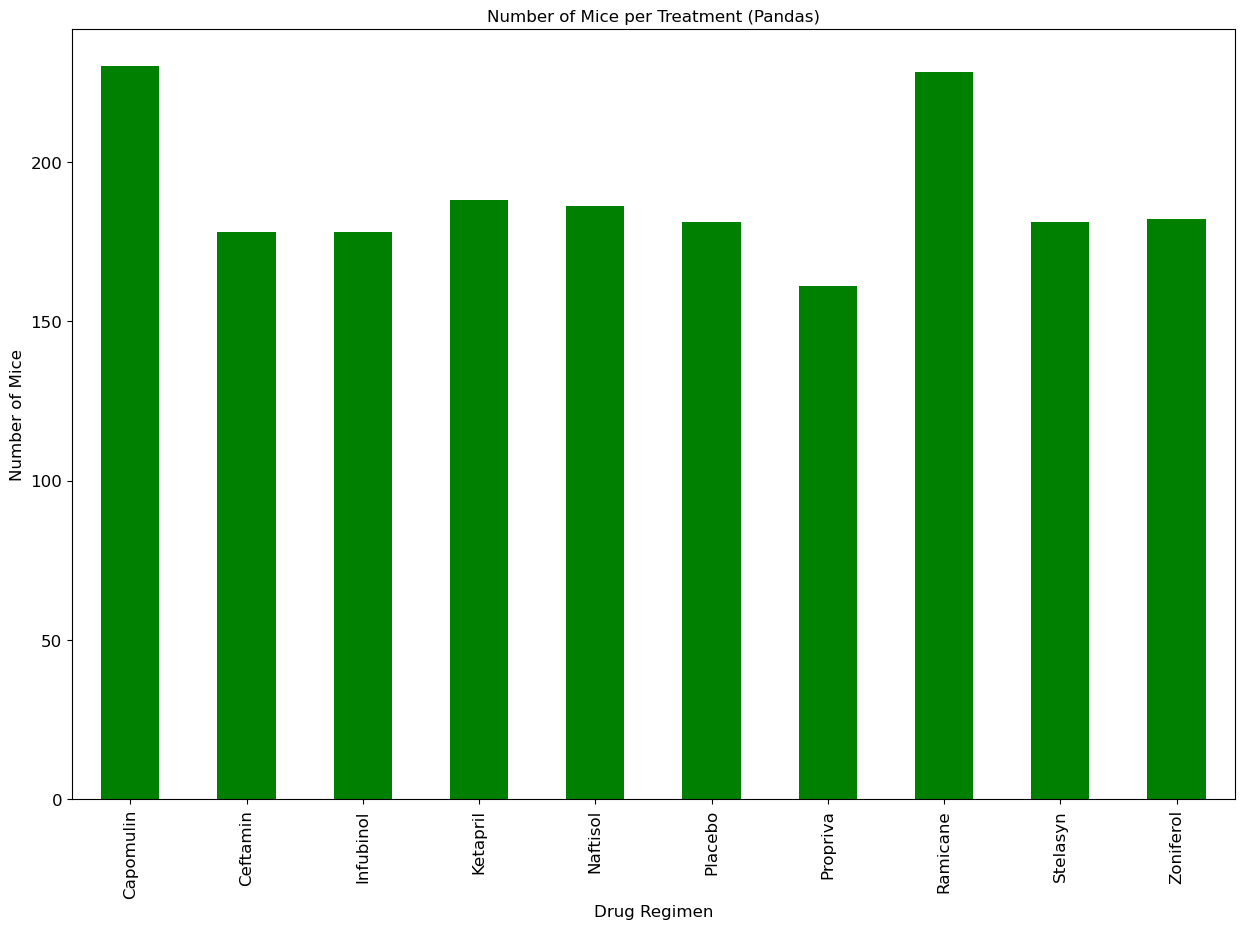

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_treatment = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_mice = mice_per_treatment.plot.bar(figsize=(15,10), color='g', fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment (Pandas)", fontsize=12)
plt.tight_layout
plt.show()

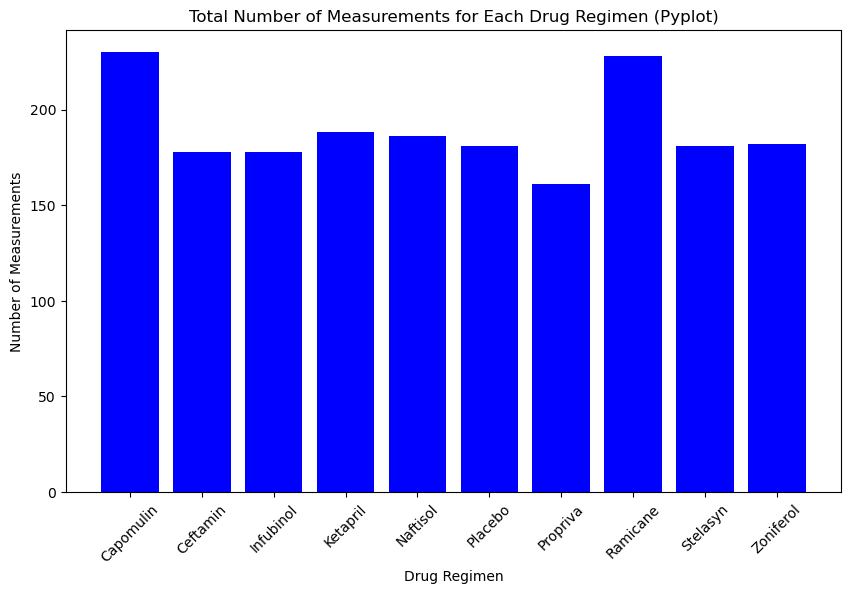

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(mice_per_treatment.index, mice_per_treatment.values, color='blue')
plt.title('Total Number of Measurements for Each Drug Regimen (Pyplot)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=45)
plt.show()

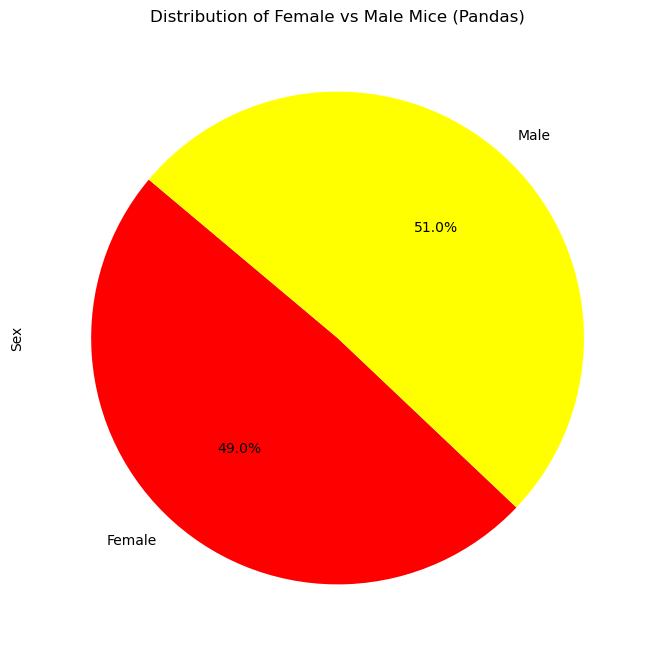

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_df = analysis_data_df.groupby("Sex")
sex_count = sex_df["Sex"].count()
plt.figure(figsize=(8,8))
sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['red', 'yellow'])
plt.title('Distribution of Female vs Male Mice (Pandas)')
plt.ylabel('Sex')
plt.show()


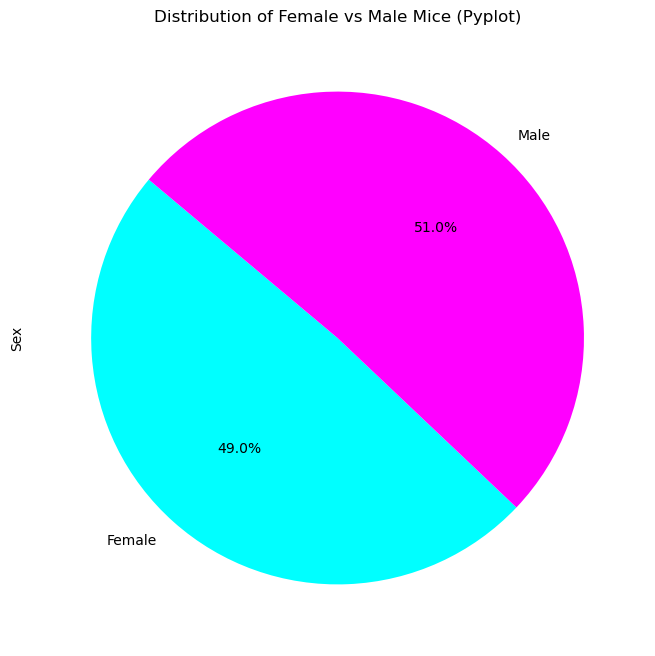

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8,8))
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=140, colors=['cyan', 'magenta'])
plt.title('Distribution of Female vs Male Mice (Pyplot)')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for treatment in treaments: 
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Adding subset to the tumor_vol_data list
    final_tumor_vol_list.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

print(f"{treatment} Regimen")
print(f"Final tumor volume(mm3) for {treatment} below {round(lower_bound,2)} could be outliers.")
print(f"Final tumor volume(mm3) for {treatment} above {round(upper_bound,2)} could be outliers.")
print(f"Average tumor volume(mm3) for {treatment} is: {round(mean,2)}")
print(f"Number of outliers for Capomulin is: {outliers.count()}")
if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')




Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceftamin is: 57.75
Number of outliers for Capomulin is: 0


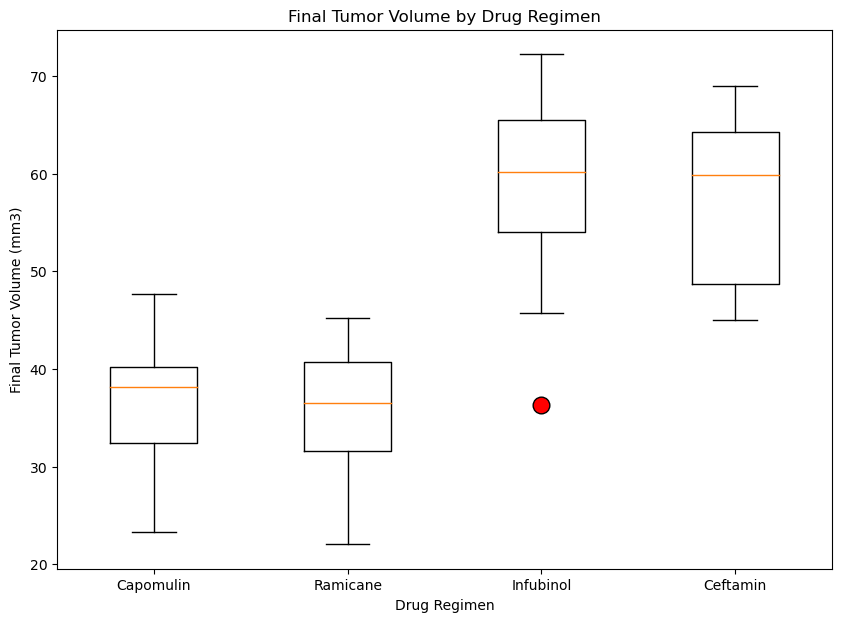

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,7))
plt.boxplot(final_tumor_vol_list, labels=treaments, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

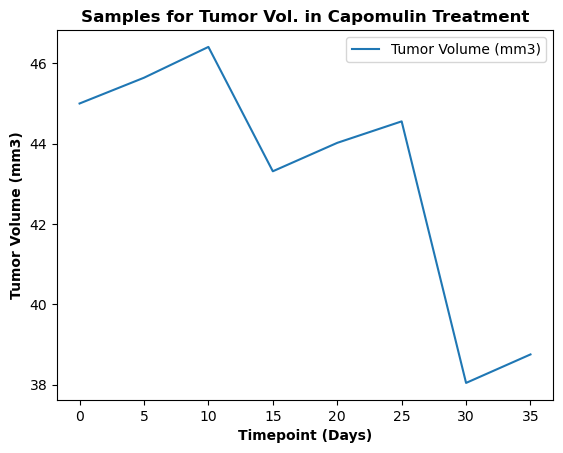

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = analysis_data_df.loc[analysis_data_df["Drug Regimen"] == "Capomulin"]
j246_mouse = Capomulin_df.loc[analysis_data_df["Mouse ID"]=="j246"]


# lineplot
lineplot = j246_mouse.plot.line(x = "Timepoint", y = "Tumor Volume (mm3)")
plt.title(f"Samples for Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

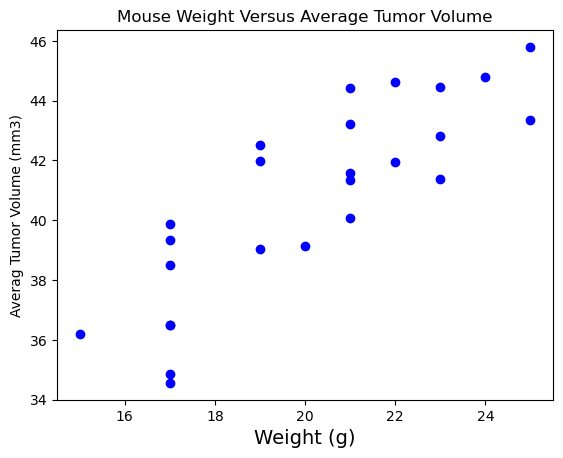

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capm_vol = Capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


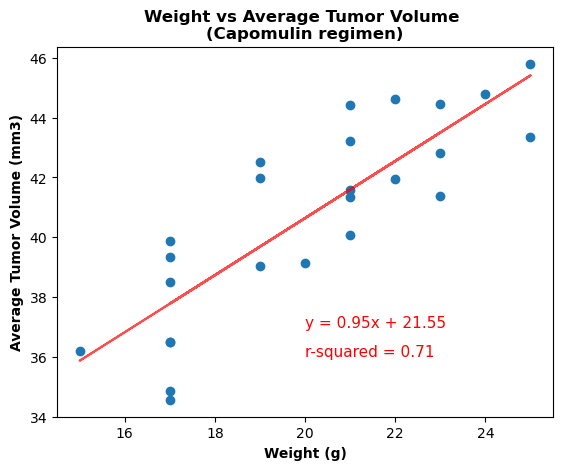

In [18]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = avg_capm_vol['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.plot(avg_capm_vol['Weight (g)'],regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

# Return the correlation coefficient, slope, intercept, and line equation


